# Coronavirus Data
A script to retrieve and parse COVID-19 data provided by JHU CSSE

In [1]:
import datetime
import io
import matplotlib.pyplot as plt
import matplotlib.ticker as tic
import pandas as pd
import requests

## First get raw data from the [JHU CSSE repository](https://github.com/CSSEGISandData/COVID-19)

In [2]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-{}.csv'
categories = ['Confirmed', 'Recovered', 'Deaths']
raw = {category : requests.get(url.format(category)).content for category in categories}

## Then define helper functions for parsing data

In [3]:
def get_indices(place, category):
    """Find the indices corresponding to a certain place (i.e. state or region) and category"""
    place = place.lower()
    data_frame = pd.read_csv(io.StringIO(raw[category].decode('utf-8')))
    indices = data_frame.index[data_frame['Province/State'].str.match(place, case=False, na=False) |
                               data_frame['Country/Region'].str.match(place, case=False, na=False)]
    return indices.tolist()

In [4]:
def get_series(place, category):
    """Parse the data for a certain place (i.e. state or region) and category"""
    data_frame = pd.read_csv(io.StringIO(raw[category].decode('utf-8')))
    data_frame = data_frame.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1)
    return data_frame.iloc[get_indices(place, category)].sum()

## Finally test the helper functions

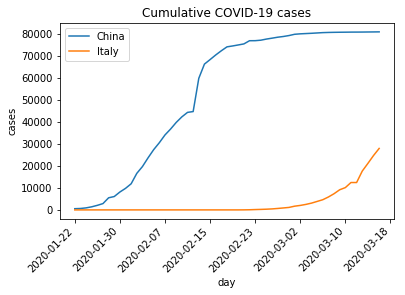

In [5]:
if __name__ == '__main__':
    series_china = get_series('china', 'Confirmed')
    series_italy = get_series('italy', 'Confirmed')
    fig, ax = plt.subplots()
    plt.title('Cumulative COVID-19 cases')
    plt.plot(series_china, label='China')
    plt.plot(series_italy, label='Italy')
    plt.xlabel('day')
    plt.ylabel('cases')
    plt.legend()
    def to_date(x, pos, today=datetime.datetime.strptime(series_china.index[0], '%m/%d/%y').date()):
        return today+datetime.timedelta(days=x)
    fmt = tic.FuncFormatter(to_date)
    ax.xaxis.set_major_formatter(fmt)
    ax.xaxis.set_major_locator(plt.MaxNLocator(8))
    fig.autofmt_xdate(rotation=45)
    plt.show()